In [1]:
from sklearn.impute   import SimpleImputer
import pandas as pd
df=pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

In [2]:
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [3]:
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [4]:
# Data Preparation
df['AGE_PERCENTIL'] = df['AGE_PERCENTIL'].str.replace('Above ','').str.extract(r'(.+?)th')
df['WINDOW'] = df['WINDOW'].str.replace('ABOVE_12','12-more').str.extract(r'(.+?)-')

In [5]:
# Missingness as features
df['row_missingness'] = df.isnull().sum(axis=1)

In [6]:
# Mean imputation
mean_impute  = SimpleImputer(strategy='mean')
imputed_data = mean_impute.fit_transform(df)
imputed_data = pd.DataFrame(imputed_data, columns = df.columns)

In [7]:
imputed_data.isnull().sum()

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
row_missingness               0
Length: 232, dtype: int64

In [8]:
imputed_data.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,row_missingness
0,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,180.0
1,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0,180.0
2,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,4.0,0.0,36.0
3,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-0.786997,-0.715950,-0.817800,-0.719147,-1.000000,-1.000000,6.0,0.0,204.0
4,0.0,1.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,12.0,1.0,0.0


In [9]:
target=["ICU"]
un=["row_missingness"]
numericals=list(set(imputed_data.columns.values)-set(target)-set(un))
len(numericals)

230

In [10]:
new_df=imputed_data[numericals]
new_df.shape
tar=imputed_data[target]
tar.shape
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.3)
x.shape

(1347, 230)

In [11]:
y.head(5)

,ICU
153,0.0
1501,0.0
918,0.0
953,0.0
1385,0.0


In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [13]:
pred_val=lr.predict(x_test)

In [14]:
lr.predict_proba(x_test)[:,1]

array([0.06726848, 0.01748679, 0.03132615, 0.63652852, 0.83659369,
       0.98353237, 0.09340928, 0.14653655, 0.10132855, 0.59672323,
       0.02766558, 0.07720937, 0.08867141, 0.38913848, 0.57397102,
       0.62830325, 0.01981117, 0.50007932, 0.33562372, 0.17247299,
       0.2825359 , 0.01223257, 0.16533113, 0.3634704 , 0.01030363,
       0.00357205, 0.13244659, 0.8310039 , 0.38154498, 0.02766731,
       0.1120887 , 0.11422172, 0.25438876, 0.05486655, 0.11947147,
       0.09075359, 0.07380538, 0.04187712, 0.81283598, 0.57093813,
       0.1286305 , 0.33206674, 0.22834203, 0.15032735, 0.92668384,
       0.17075883, 0.09804693, 0.09940966, 0.02651611, 0.15027296,
       0.05885624, 0.0407949 , 0.15686596, 0.27150586, 0.03456455,
       0.73065883, 0.17458985, 0.96164559, 0.06418828, 0.94099312,
       0.11546798, 0.1143433 , 0.07601335, 0.01750756, 0.11168483,
       0.38030212, 0.13659712, 0.31199832, 0.0244161 , 0.01437201,
       0.02439568, 0.0938825 , 0.08578817, 0.10836912, 0.11161

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
accuracy_score(y_test,pred_val)

0.8598615916955017

In [16]:
confusion_matrix(y_test,pred_val)

array([[401,  21],
       [ 60,  96]], dtype=int64)

In [17]:
import pickle
saved_model1=pickle.dumps(lr)

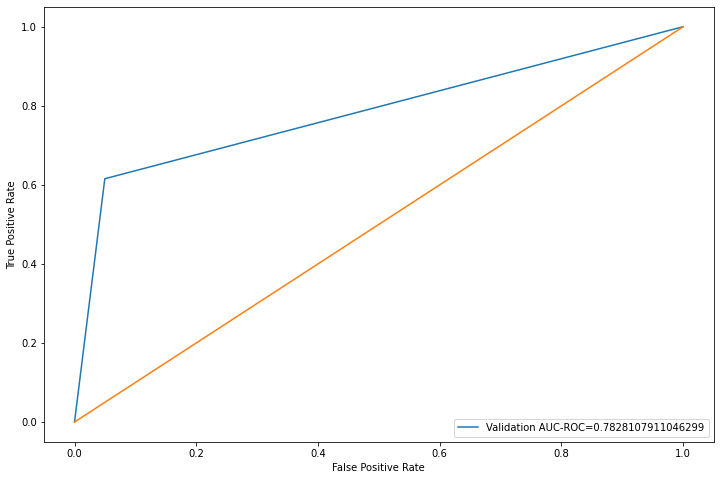

In [18]:
import numpy as np
import matplotlib.pyplot as plt
fpr,tpr,_=roc_curve(y_test,pred_val)
auc = roc_auc_score(y_test, pred_val)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [19]:
model23=LogisticRegression()

In [20]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [21]:
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    model23.fit(x1_train,y1_train)
    prediction=model23.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)

[0.8911917098445595, 0.8652849740932642, 0.8497409326424871, 0.8601036269430051, 0.8290155440414507, 0.8385416666666666, 0.8333333333333334, 0.8854166666666666, 0.859375, 0.8489583333333334]


In [22]:
np.array(accuracy).mean()
pred23=model23.predict(x_test)
pred23

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0.

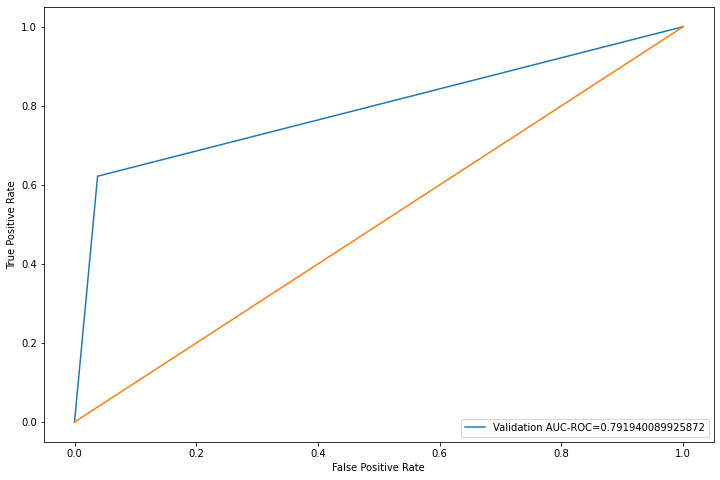

In [23]:
fpr,tpr,_=roc_curve(y_test,pred23)
auc = roc_auc_score(y_test, pred23)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [24]:
confusion_matrix(y_test,pred23)

array([[406,  16],
       [ 59,  97]], dtype=int64)

In [25]:
import pickle

In [26]:
saved_model2=pickle.dumps(model23)

In [27]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.4)


In [28]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x,y)

GaussianNB()

In [29]:
y_pred1=nb.predict(x_test)
y_pred1

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.7727272727272727

In [32]:
confusion_matrix(y_test,y_pred1)

array([[499,  62],
       [113,  96]], dtype=int64)

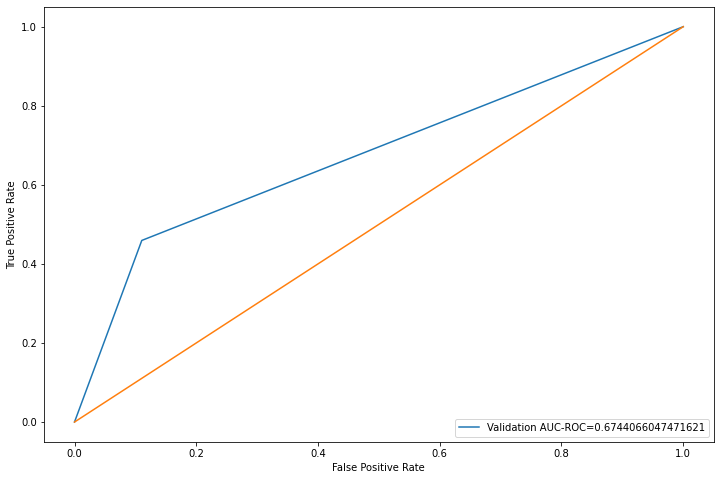

In [33]:
fpr,tpr,_=roc_curve(y_test,y_pred1)
auc = roc_auc_score(y_test, y_pred1)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [34]:
import pickle
saved_model3=pickle.dumps(nb)

In [35]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [36]:
from sklearn.naive_bayes import GaussianNB
nb2=GaussianNB()
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    nb2.fit(x1_train,y1_train)
    prediction=nb2.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    acc.append(score)
print(acc)

[0.7823834196891192, 0.7616580310880829, 0.7461139896373057, 0.7875647668393783, 0.772020725388601, 0.8020833333333334, 0.78125, 0.7916666666666666, 0.8072916666666666, 0.7916666666666666]


In [37]:
np.array(acc).mean()

0.7823699265975821

In [38]:
pred34=nb2.predict(x_test)

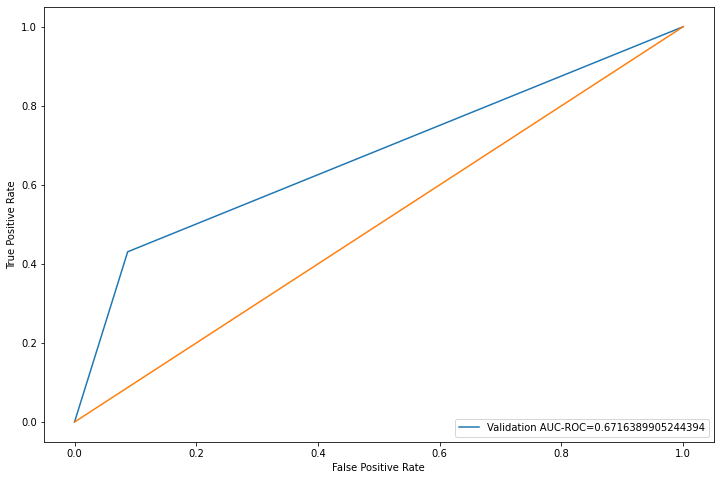

In [39]:
fpr,tpr,_=roc_curve(y_test,pred34)
auc = roc_auc_score(y_test, pred34)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [40]:
confusion_matrix(y_test,pred34)

array([[512,  49],
       [119,  90]], dtype=int64)

In [41]:
saved_model4=pickle.dumps(nb2)

In [42]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.3)
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x,y)
pred=sgd.predict(x_test)
pred

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [43]:
accuracy_score(y_test,pred)

0.8235294117647058

In [44]:
confusion_matrix(y_test,pred)

array([[425,  11],
       [ 91,  51]], dtype=int64)

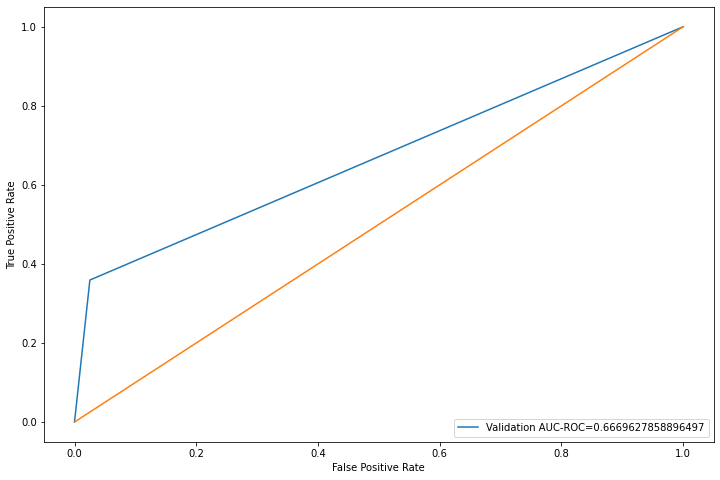

In [45]:
fpr,tpr,_=roc_curve(y_test,pred)
auc = roc_auc_score(y_test, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [46]:
saved_model5=pickle.dumps(sgd)

In [47]:
from sklearn.model_selection import StratifiedKFold
acc2=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [48]:
from sklearn.linear_model import SGDClassifier
sgd2=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    sgd2.fit(x1_train,y1_train)
    prediction=nb2.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    acc2.append(score)
print(acc2)
saved_model6=pickle.dumps(sgd2)

[0.7823834196891192, 0.7616580310880829, 0.7461139896373057, 0.8031088082901554, 0.7823834196891192, 0.8072916666666666, 0.796875, 0.796875, 0.8125, 0.7916666666666666]


In [49]:
np.array(acc2).mean()

0.7880856001727117

In [50]:
pred45=sgd2.predict(x_test)

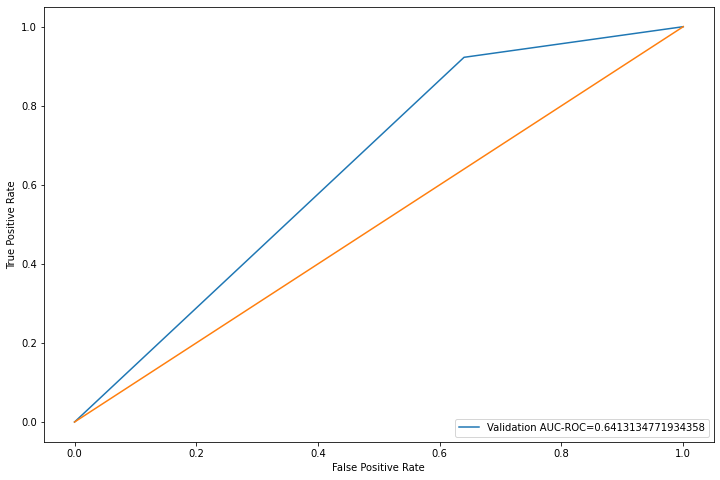

In [51]:
fpr,tpr,_=roc_curve(y_test,pred45)
auc = roc_auc_score(y_test, pred45)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [52]:
confusion_matrix(y_test,pred45)

array([[157, 279],
       [ 11, 131]], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.4)
from xgboost import XGBClassifier
model7=XGBClassifier()
model7.fit(x,y)

[15:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
pred7=model7.predict(x_test)

In [55]:
pred7

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [56]:
accuracy_score(pred7,y_test)

0.8987012987012987

In [57]:
confusion_matrix(y_test,pred7)

array([[542,  22],
       [ 56, 150]], dtype=int64)

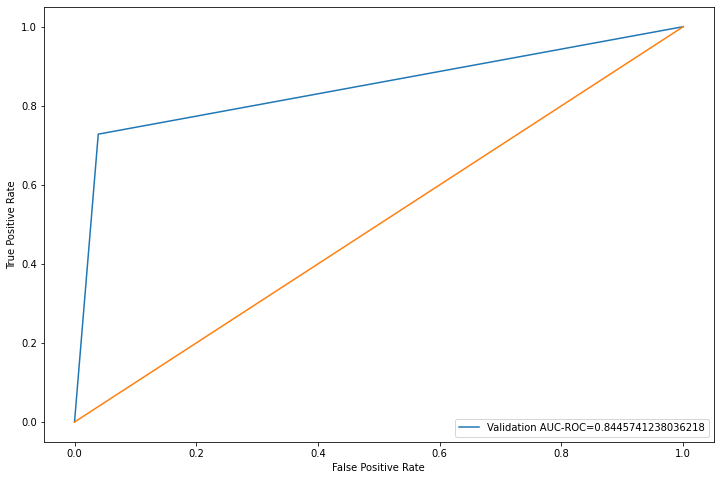

In [58]:
fpr,tpr,_=roc_curve(y_test,pred7)
auc = roc_auc_score(y_test, pred7)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [59]:
saved_model7=pickle.dumps(model7)

In [60]:
from sklearn.model_selection import StratifiedKFold
acc3=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(new_df,tar)

10

In [61]:
from xgboost import XGBClassifier
model8=XGBClassifier()
for train_index,test_index in skf.split(new_df,tar):
    x1_train,x1_test=new_df.iloc[train_index],new_df.iloc[test_index]
    y1_train,y1_test=tar.iloc[train_index],tar.iloc[test_index]
    model8.fit(x1_train,y1_train)
    prediction=model8.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    acc3.append(score)
print(np.array(acc3).mean())

[15:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [62]:
pred56=model8.predict(x_test)

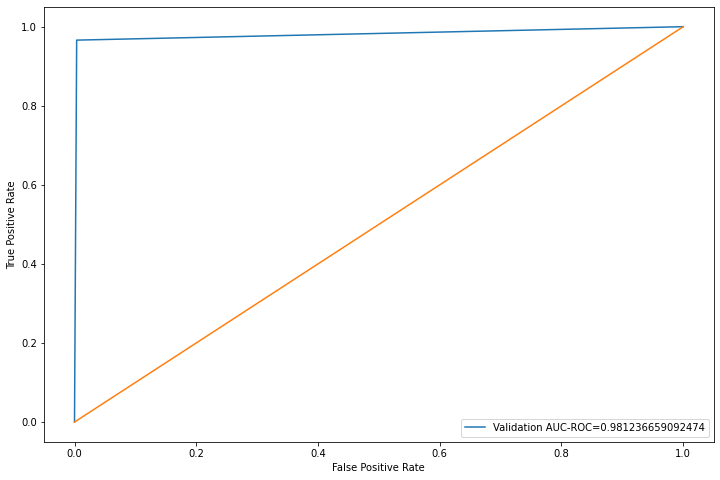

In [63]:
fpr,tpr,_=roc_curve(y_test,pred56)
auc = roc_auc_score(y_test, pred56)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [64]:
confusion_matrix(y_test,pred56)

array([[562,   2],
       [  7, 199]], dtype=int64)

In [65]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('xgb', XGBClassifier()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [66]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['xgb'] = XGBClassifier()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

In [67]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>lr 0.851 (0.030)
>xgb 0.874 (0.028)
>bayes 0.773 (0.034)
>stacking 0.872 (0.028)


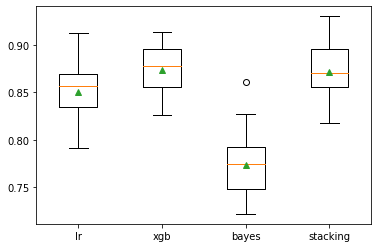

In [68]:
from sklearn.model_selection import train_test_split
x,x_test,y,y_test=train_test_split(new_df,tar,test_size=0.4)
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

<BarContainer object of 4 artists>

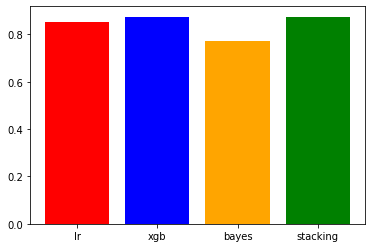

In [69]:
b=[]
for i in range(4):
    b.append(results[i].mean())
b
plt.bar(names,b,color=["red","blue","orange","green"])